In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

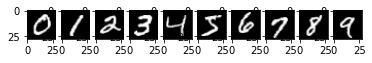

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = np.unique(y_train, return_index=True)
img_rows, img_cols = 28, 28
X_train = x_train[num_classes[1:]]
Y_train = y_train[num_classes[1:]]
p,a = plt.subplots(1, 10)
for i in range(0,10):
    a[i].imshow(X_train[i].reshape(img_rows,img_cols), cmap='gray')
plt.show()

In [3]:
print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)


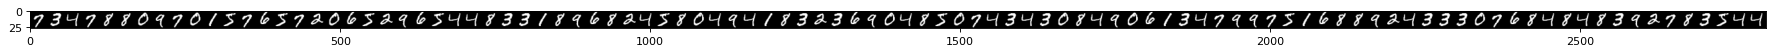

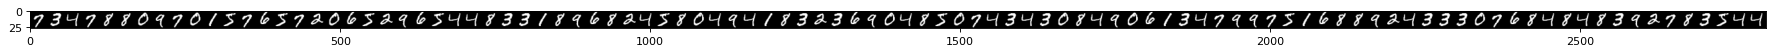

In [4]:
def stroki(image):
    l = []
    n = []
    for _ in range(110):
        f = np.random.randint(0,10,100)
        k = image[f].reshape(100,1,28*28)
        l.append(k)
        n.append(f)
    for m in [3,5]:
        figure(figsize=(28, 22), dpi=80)
        plt.imshow(np.concatenate(l[i].reshape(100,28,28),axis = 1),cmap = 'gray')
        plt.show()
    return l,n
        
l,n = stroki(X_train)
l = np.array(l)
n = np.array(n)

In [13]:
def noisy(images):
    noises = []
    for image in images:
        row, col, ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        if noisy.min() < 0:
            low_clip = -1.
        else:
            low_clip = 0.
        noisy = np.clip(noisy, low_clip, 1)
        noises.append(noisy)
    for m in [3,5]:
        figure(figsize=(28, 22), dpi=80)
    return noises
j = noisy(l)
j = np.array(j)

<Figure size 2240x1760 with 0 Axes>

<Figure size 2240x1760 with 0 Axes>

In [7]:
def perceptron(x,y,lambd):
    for k in range(len(lambd)):
        encoded_x = np.zeros(x.shape)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if k == y[i][j]: 
                    encoded_x[i][j] = x[i][j]
                else:
                    encoded_x[i][j] = -x[i][j]

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if np.dot(lambd[k],encoded_x[i][j][0])<=0:  
                    lambd[k]+=encoded_x[i][j][0]
                    lambd = perceptron(x,y,lambd)
    return lambd

In [8]:
t = []
for i in range(110):
    f = np.random.randint(0,10,100)
    t.append(f)
t = np.array(t)
train_x, train_y, test_x, test_y = j[:10],n[:10],j[10:],n[10:]

In [9]:
lambd = np.zeros((10,28*28))
lambd = perceptron(train_x,train_y,lambd)

In [16]:
predicts = []
targets = []
d = 0
for i in range(test_x.shape[0]):
    for j in range(test_x.shape[1]):
        target = test_y[i][j]
        targets.append(target)
        predict = np.zeros(10)
        for z in range(10):
            predict[z] = np.dot(lambd[z],test_x[i][j][0])
        predict = np.argmax(predict)
        predicts.append(predict)
        if predict!=target:
            d += 1

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(targets,predicts)

1.0